#### **Hierarchical Clustering**

- Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters 
- The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other

**Type of Hierarchical Clustering**
1. **Agglomerative Clustering** which is a method of clustering which builds a hierarchy of clusters by merging together small clusters, it is a **bottom up approach**

2. **Divisive Clustering**, is a **top down approach** where we consider all the observation as a single big cluster and then divide into small clusters  

#### **Denodogram**

- The dendrogram is a visual representation of the compound correlation data
- The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes
- Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node

#### **Silhouette Score**

- Clusters are well apart from each other as the silhouette score is closer to 1
- Silhouette Coefficient score is a metric used to **calculate the goodness of a clustering technique** 
- Its value ranges from -1 to 1.
    1. **Score = 1: Means clusters are well apart** from each other and clearly distinguished.
    2. **Score = 0: Means clusters are indifferent**, or we can say that the distance between clusters is not significant.
    3. **Score = -1: Means clusters are assigned in the wrong way**

# Introduction to Hierarchical Clustering in Python with Sklearn

In [2]:
# Importing Libraries

from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from scipy.spatial import distance # To calculate distances
from IPython.display import Image
import scipy.cluster.hierarchy as sch

HIERARCHICAL CLUSTERING ALGORITHIM STEPS :


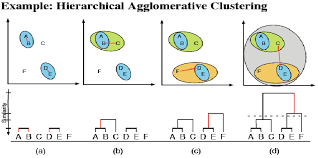

In [ ]:
print('HIERARCHICAL CLUSTERING ALGORITHIM STEPS :')
Image('F037A50D-FDEF-4187-962D-CB74158F4FFC.png')

HIERARCHICAL CLUSTERING ALGORITHIM TYPE :


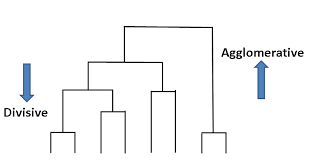

In [ ]:
print('HIERARCHICAL CLUSTERING ALGORITHIM TYPE :')
Image('207B916C-6140-4038-AA53-0027F4E66C3C.png')

DIFFERENT TYPE OF LINKAGE :


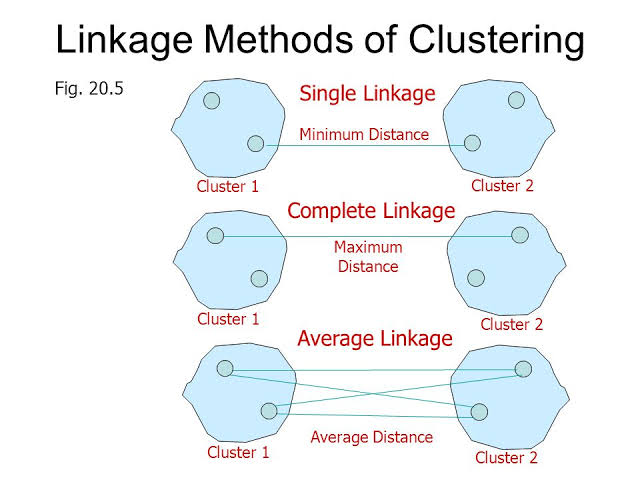

In [ ]:
print('DIFFERENT TYPE OF LINKAGE :')
Image('093C32DB-A817-4026-889C-CF26F7240891.jpeg')

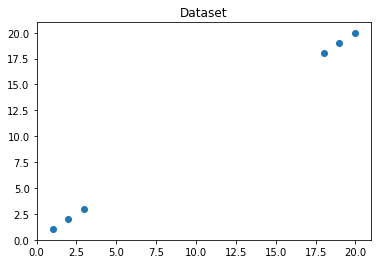

In [2]:
# Lets take an small example
x_axis = np.array([1,2,3,18,19,20])
y_axis = np.array([1,2,3,18,19,20])

data = pd.DataFrame({'x':x_axis, 'y':y_axis})

plt.plot()
plt.xlim([0,21])
plt.ylim([0,21])
plt.title('Dataset')
plt.scatter(x_axis,y_axis)
plt.show()

#### **DENDOGRAM**

- A dendrogram is a diagram that shows the hierarchical relationship between objects. 
- **It is a summary of the distance matrix.** For example, the dendrogram suggests that C and D are much closer to each other than is C to B
- Dendrograms cannot tell you how many clusters you should have

**A common mistake people make when reading dendrograms is to assume that the shape of the dendrogram gives a clue as to how many clusters exist.** 

- In the example above, the (incorrect) interpretation is that the dendrogram shows that there are two clusters, as the distance between the clusters (the vertical segments of the dendrogram) are highest between two and three clusters.
- Interpretation of this kind is justified only when the ultrametric tree inequality holds, which, as mentioned above, is very rare.
- In general, it is a mistake to use dendrograms as a tool for determining the number of clusters in data. Where there is an obviously “correct” number of clusters this will often be evident in a dendrogram. 

However, dendrograms often suggest a correct number of clusters when there is no real evidence to support the conclusion.

DENDOGRAM EXAMPLE :


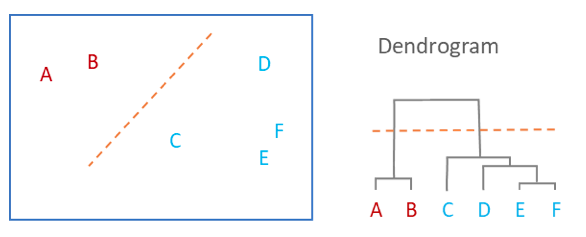

In [16]:
print('DENDOGRAM EXAMPLE :')
Image('70CA363E-F7FA-4C9D-871F-4D3FC35EC0B7.png')

DENDOGRAM OVERVIEW :


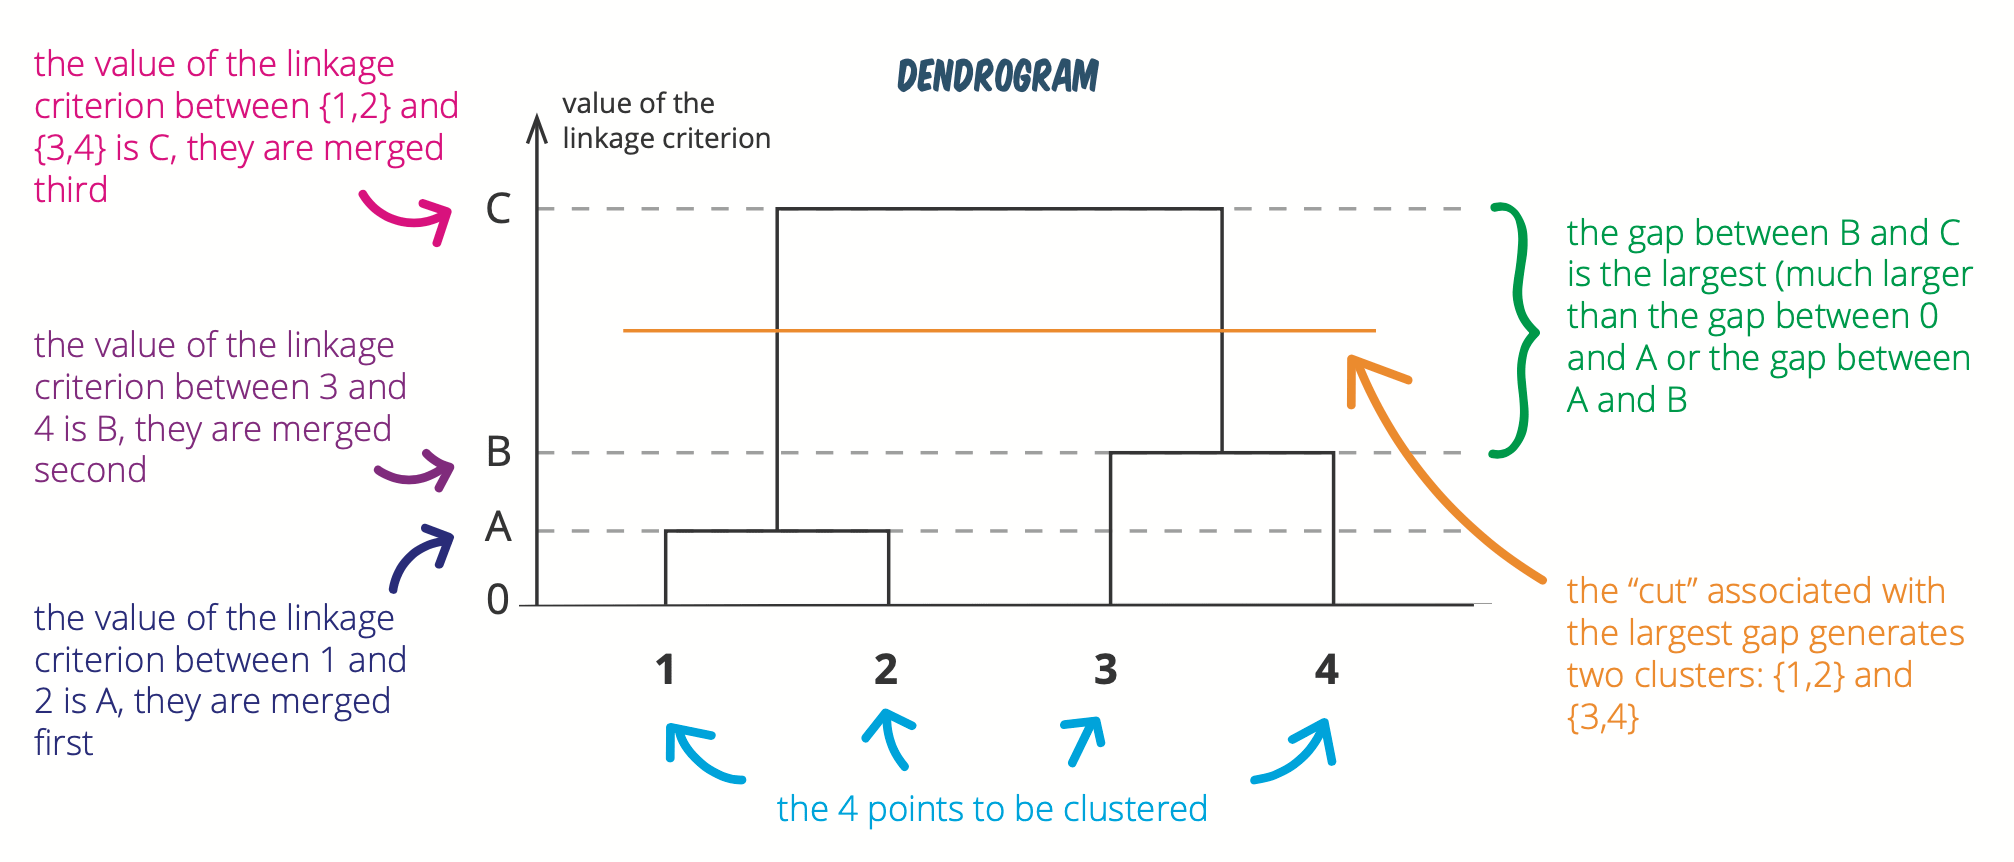

In [20]:
print('DENDOGRAM OVERVIEW :')
Image('EE76D8A0-92FA-4705-B1F6-748F38D83112.png')

Text(0, 0.5, 'Euclidean distance in the space with other variables')

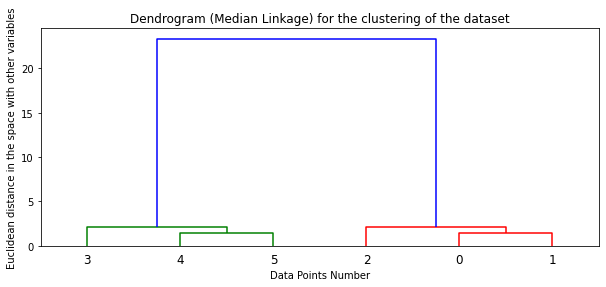

In [3]:
# Dendrogram (Median Linkage) 

Z = sch.linkage(data, method = 'median')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Median Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

Text(0, 0.5, 'Euclidean distance in the space with other variables')

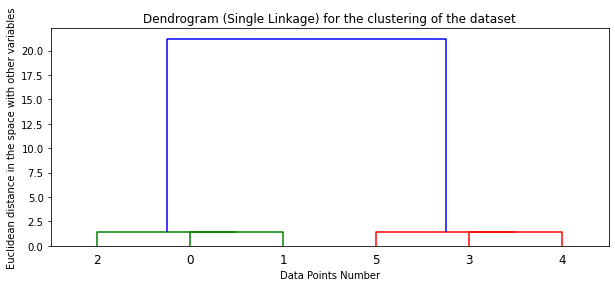

In [4]:
# Dendrogram (Single Linkage) 

Z = sch.linkage(data, method = 'single')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Single Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

Text(0, 0.5, 'Euclidean distance in the space with other variables')

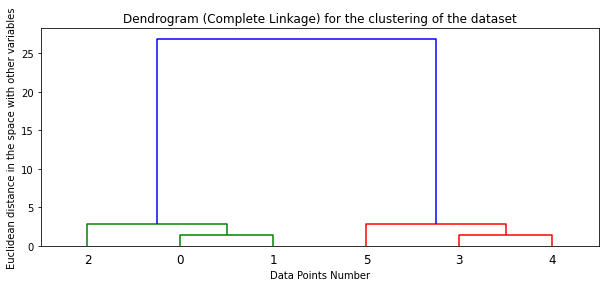

In [5]:
# Dendrogram (Complete Linkage) 

Z = sch.linkage(data, method = 'complete')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Complete Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

Text(0, 0.5, 'Euclidean distance in the space with other variables')

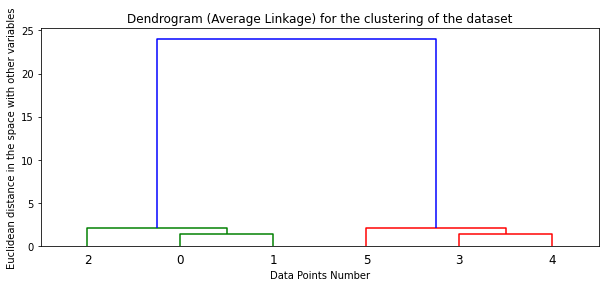

In [6]:
# Dendrogram (Average Linkage) 

Z = sch.linkage(data, method = 'average')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Average Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

In [7]:
# Building an Agglomerative Clustering Model : Initialise Model
# We analyse the above-created dendrogram 
# decide that we will be making 2 clusters for this dataset

cluster_H = AgglomerativeClustering(n_clusters=2,linkage= 'average')
# Model Fit
model_clt = cluster_H.fit(data)
print(model_clt)
print('\n')

data['clusters'] = model_clt.labels_
print('Clusters assigned to each datapoints, cluster = 2 :')
print(data['clusters'])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)


Clusters assigned to each datapoints, cluster = 2 :
0    1
1    1
2    1
3    0
4    0
5    0
Name: clusters, dtype: int64


In [8]:
# Silhouette Score
data = pd.DataFrame({'x':x_axis, 'y':y_axis})
for k in range(2,6):# Maximum range should be 6, as it contains only 6 data points
  cluster_H = AgglomerativeClustering(n_clusters=k,linkage= 'average')
  model_clt = cluster_H.fit(data)
  label = model_clt.labels_
  sil_coeff = silhouette_score(data,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))
print('\n')
print('For Cluster = 2, it has highest Silhouette Value. So Number of Cluster = 2')

For cluster= 2, Silhouette Coefficient is 0.9213643790849674
For cluster= 3, Silhouette Coefficient is 0.5428175766885445
For cluster= 4, Silhouette Coefficient is 0.16666666666666666
For cluster= 5, Silhouette Coefficient is 0.08333333333333333


For Cluster = 2, it has highest Silhouette Value. So Number of Cluster = 2


# IRIS DATASET

In [5]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [8]:
iris_X = iris_data.iloc[:, [0, 1, 2,3]].values
print(iris_X[:5,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
iris_Y = iris_data['Type'].values

# Print the target array
print(iris_Y)

# Calculate the frequency of each label
unique, counts = np.unique(iris_Y, return_counts=True)
label_frequencies = dict(zip(unique, counts))

# Print the frequency of each label
print(label_frequencies)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
{np.int64(0): np.int64(50), np.int64(1): np.int64(50), np.int64(2): np.int64(50)}


In [10]:
# Filter Setosa data
Setosa = iris_data['Type'] == 0

# Print the filter results
print("Filtering Setosa, True means its Setosa and False means Non Setosa")
print(Setosa)

# Print the top 6 rows of Setosa
print("\nTop 6 Rows of Setosa")
Setosa_v2 = iris_data[Setosa]
print(Setosa_v2.head(6))

# Print the last 6 rows of Setosa
print("\nLast 6 Rows of Setosa")
print(Setosa_v2.tail(6))

Filtering Setosa, True means its Setosa and False means Non Setosa
0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Type, Length: 150, dtype: bool

Top 6 Rows of Setosa
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   

   Type  
0     0  
1     0  
2     0  
3     0  
4     0  
5     0  

Last 6 Rows of Setosa
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
44  

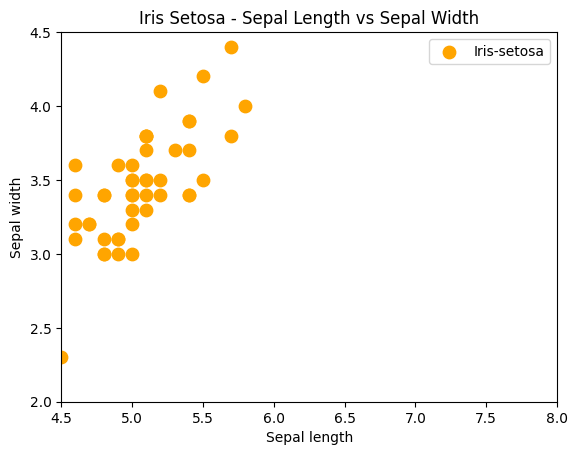

In [11]:
# Plotting
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], 
            s=80, c='orange', label='Iris-setosa')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Setosa - Sepal Length vs Sepal Width')
plt.xlim([4.5, 8])
plt.ylim([2, 4.5])
plt.legend()
plt.show()

In [12]:
# Filter Versicolor data
Versi = iris_data['Type'] == 1

# Print the filter results
print("Filtering Versicolour, True means it's Versicolour and False means Non Versicolour")
print(Versi)

# Print the top 6 rows of Versicolour
print("\nTop 6 Rows of Versicolour")
Versi_v2 = iris_data[Versi]
print(Versi_v2.head(6))

# Print the last 6 rows of Versicolour
print("\nLast 6 Rows of Versicolour")
print(Versi_v2.tail(6))

Filtering Versicolour, True means it's Versicolour and False means Non Versicolour
0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Type, Length: 150, dtype: bool

Top 6 Rows of Versicolour
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   
55                5.7               2.8                4.5               1.3   

    Type  
50     1  
51     1  
52     1  
53     1  
54     1  
55     1  

Last 6 Rows of Versicolour
    sepal length (cm)  sepal width (cm)  pet

Versicolour for 2D Plot
X Axis points
[7.  6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8
 6.2 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.
 6.7 6.3 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7]

Y Axis Points
[3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7
 2.2 2.5 3.2 2.8 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4
 3.1 2.3 3.  2.5 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8]




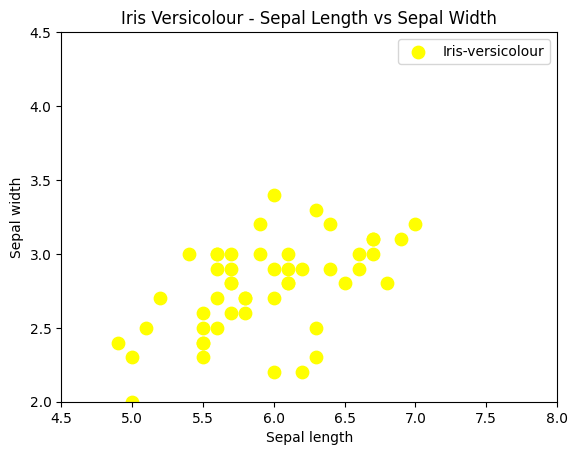

In [13]:
# Filter Versicolour for 2D Plot
print("Versicolour for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 1, 0])
print("\nY Axis Points")
print(iris_X[iris_Y == 1, 1])
print('\n')

# Plotting
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], 
            s=80, c='yellow', label='Iris-versicolour')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Versicolour - Sepal Length vs Sepal Width')
plt.xlim([4.5, 8])
plt.ylim([2, 4.5])
plt.legend()
plt.show()

In [16]:
 #Filter Virginica data
Virginica = iris_data['Type'] == 2

# Print the filter results
print("Filtering Virginica, True means it's Virginica and False means Non Virginica")
print(Virginica)

# Print the top 6 rows of Virginica
print("\nTop 6 Rows of Virginica")
Virginica_v2 = iris_data[Virginica]
print(Virginica_v2.head(6))

# Print the last 6 rows of Virginica
print("\nLast 6 Rows of Virginica")
print(Virginica_v2.tail(6))

Filtering Virginica, True means it's Virginica and False means Non Virginica
0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: Type, Length: 150, dtype: bool

Top 6 Rows of Virginica
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   
105                7.6               3.0                6.6               2.1   

     Type  
100     2  
101     2  
102     2  
103     2  
104     2  
105     2  

Last 6 Rows of Virginica
     sepal length (cm)  sepal width (cm)

Virginica for 2D Plot
X Axis points
[6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7
 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7
 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8 6.7 6.7 6.3 6.5 6.2 5.9]

Y Axis Points
[3.3 2.7 3.  2.9 3.  3.  2.5 2.9 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8
 2.6 2.2 3.2 2.8 2.8 2.7 3.3 3.2 2.8 3.  2.8 3.  2.8 3.8 2.8 2.8 2.6 3.
 3.4 3.1 3.  3.1 3.1 3.1 2.7 3.2 3.3 3.  2.5 3.  3.4 3. ]




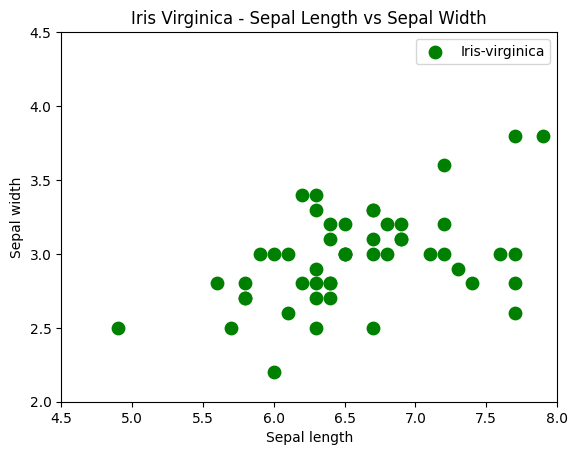

In [17]:
# Filter Virginica for 2D Plot
print("Virginica for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 2, 0])
print("\nY Axis Points")
print(iris_X[iris_Y == 2, 1])
print('\n')

# Plotting
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], 
            s=80, c='green', label='Iris-virginica')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Virginica - Sepal Length vs Sepal Width')
plt.xlim([4.5, 8])
plt.ylim([2, 4.5])
plt.legend()
plt.show()

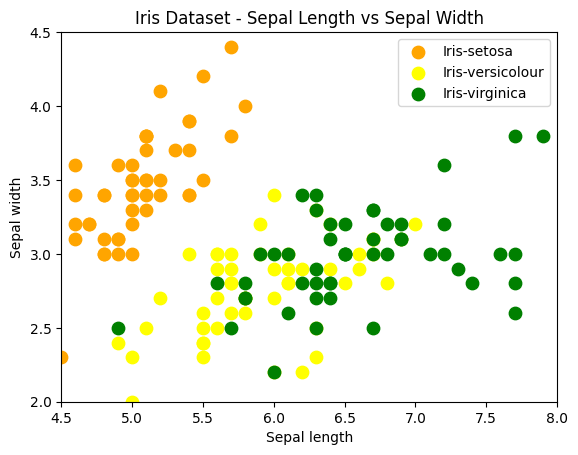

In [18]:
# Plotting all three classes
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], 
            s=80, c='orange', label='Iris-setosa')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], 
            s=80, c='yellow', label='Iris-versicolour')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], 
            s=80, c='green', label='Iris-virginica')

# Adding labels and title
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Dataset - Sepal Length vs Sepal Width')
plt.legend()
plt.xlim([4.5, 8])
plt.ylim([2, 4.5])
plt.show()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


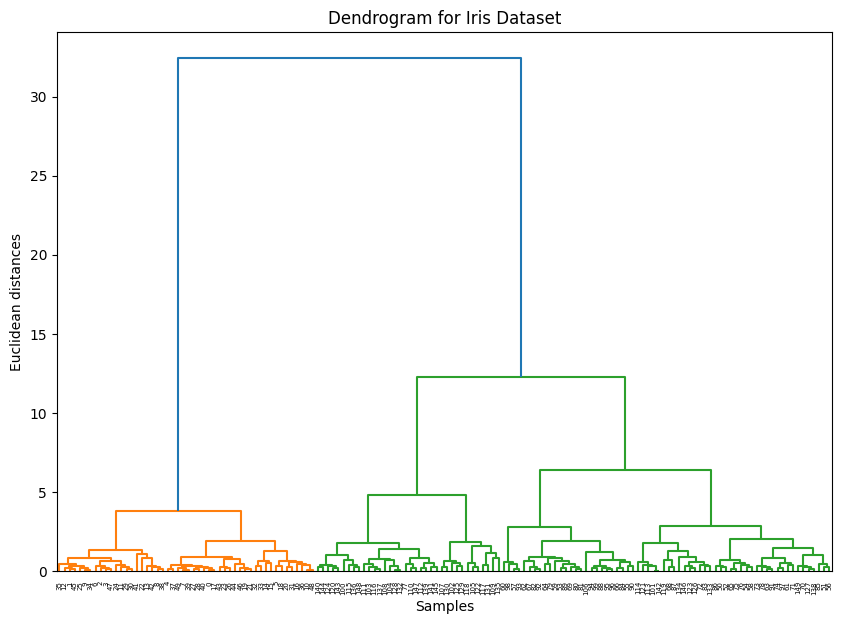

In [19]:
# Pick the features from the original dataset (excluding the target column)
iris_X_1 = iris_data[['sepal length (cm)', 'sepal width (cm)', 
                      'petal length (cm)', 'petal width (cm)']]
print(iris_X_1.head())

# Plotting the Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Iris Dataset")
dendrogram = sch.dendrogram(sch.linkage(iris_X_1, method='ward'))
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

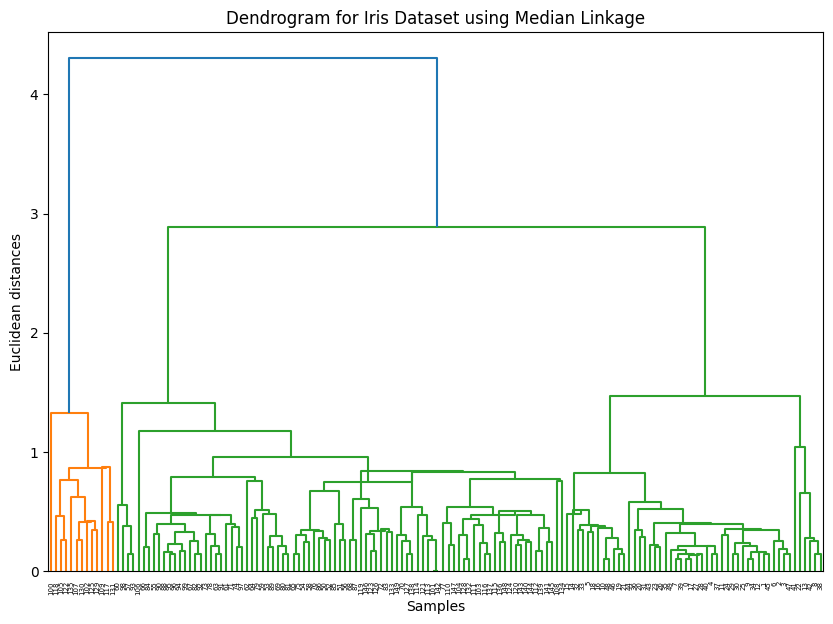

In [20]:
# Plotting the Dendrogram using median linkage
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Iris Dataset using Median Linkage")
dendrogram = sch.dendrogram(sch.linkage(iris_X_1, method='median'))
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


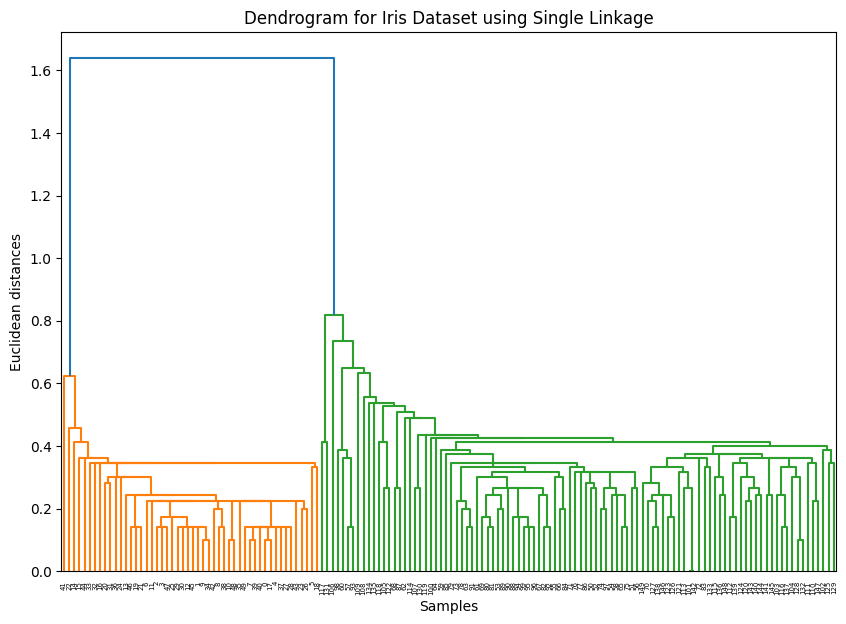

In [21]:
# Pick the features from the original dataset (excluding the target column)
iris_X_1 = iris_data[['sepal length (cm)', 'sepal width (cm)', 
                      'petal length (cm)', 'petal width (cm)']]
print(iris_X_1.head())

# Plotting the Dendrogram using single linkage
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Iris Dataset using Single Linkage")
dendrogram = sch.dendrogram(sch.linkage(iris_X_1, method='single'))
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


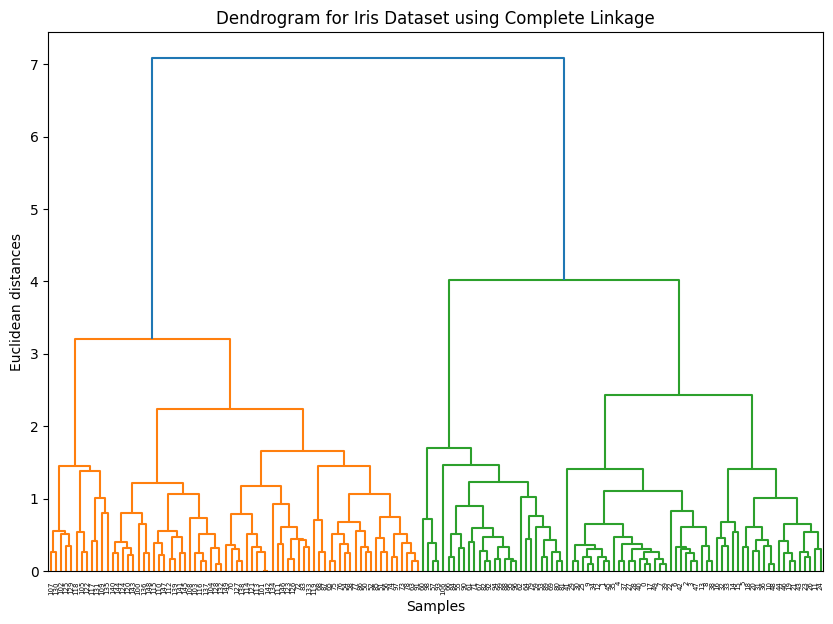

In [22]:
# Pick the features from the original dataset (excluding the target column)
iris_X_1 = iris_data[['sepal length (cm)', 'sepal width (cm)', 
                      'petal length (cm)', 'petal width (cm)']]
print(iris_X_1.head())

# Plotting the Dendrogram using complete linkage
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Iris Dataset using Complete Linkage")
dendrogram = sch.dendrogram(sch.linkage(iris_X_1, method='complete'))
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


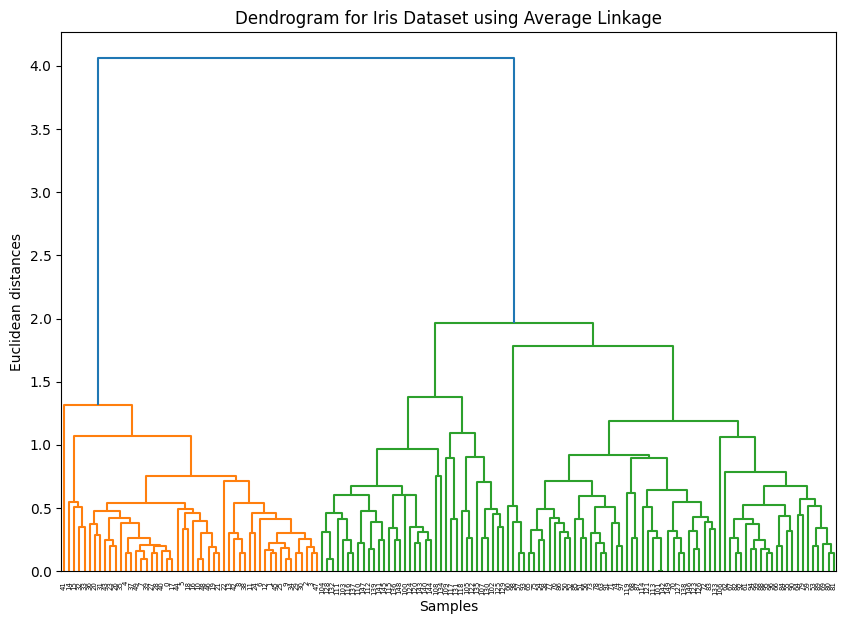

In [23]:
# Pick the features from the original dataset (excluding the target column)
iris_X_1 = iris_data[['sepal length (cm)', 'sepal width (cm)', 
                      'petal length (cm)', 'petal width (cm)']]
print(iris_X_1.head())

# Plotting the Dendrogram using average linkage
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Iris Dataset using Average Linkage")
dendrogram = sch.dendrogram(sch.linkage(iris_X_1, method='average'))
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [24]:
# Pick the features from the original dataset (excluding the target column)
iris_X_1 = iris_data[['sepal length (cm)', 'sepal width (cm)', 
                      'petal length (cm)', 'petal width (cm)']]
print(iris_X_1.head())

# Initialise the Agglomerative Clustering Model with 3 clusters
cluster_H = AgglomerativeClustering(n_clusters=3)

# Fitting the model
model_clt = cluster_H.fit(iris_X_1)

# Display the fitted model
print(model_clt)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
AgglomerativeClustering(n_clusters=3)


In [25]:
# Initialise the Agglomerative Clustering Model with 3 clusters
cluster_H = AgglomerativeClustering(n_clusters=3)

# Fitting the model
model_clt = cluster_H.fit(iris_X_1)

# Predicting Output Class
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)

# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
{np.int64(0): np.int64(64), np.int64(1): np.int64(50), np.int64(2): np.int64(36)}


Original Cluster
{np.int64(0): np.int64(50), np.int64(1): np.int64(50), np.int64(2): np.int64(50)}
Hierarchical Clustering Output Cluster
{np.int64(0): np.int64(64), np.int64(1): np.int64(50), np.int64(2): np.int64(36)}
Silhouette Score for 3 Clusters
0.5543236611296419




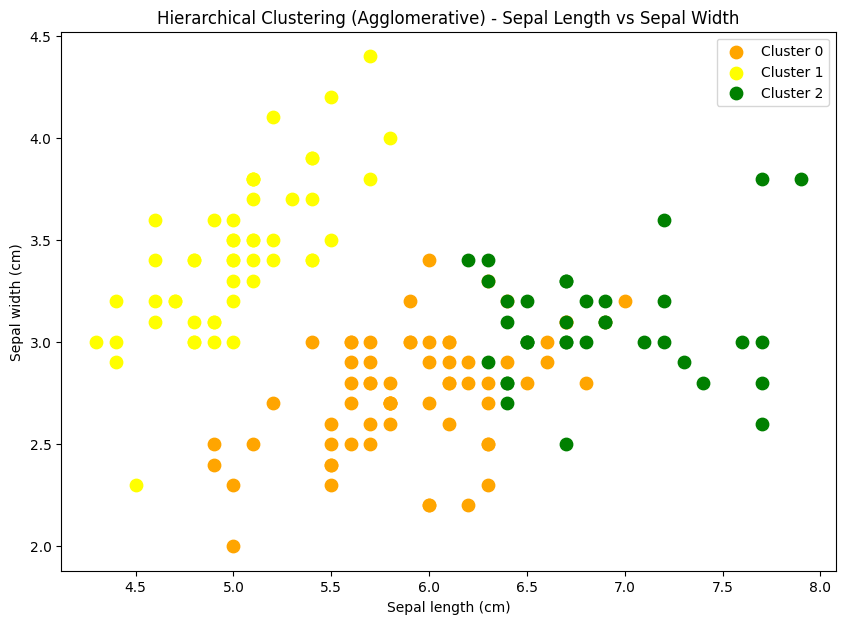

In [27]:
# Initialise the Agglomerative Clustering Model with 3 clusters
cluster_H = AgglomerativeClustering(n_clusters=3)

# Fitting the model
model_clt = cluster_H.fit(iris_X_1)

# Predicting Output Class
pred1 = model_clt.labels_

# Frequency count of the Original clusters
print('Original Cluster')
unique_original, counts_original = np.unique(iris_data['Type'], return_counts=True)
freq_1 = dict(zip(unique_original, counts_original))
print(freq_1)

# Frequency count of the Output clusters
print('Hierarchical Clustering Output Cluster')
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

# Silhouette Score
sil_score = silhouette_score(iris_X_1, pred1)
print('Silhouette Score for 3 Clusters')
print(sil_score)
print('\n')

# Visualizing the clusters
plt.figure(figsize=(10, 7))
plt.scatter(iris_X_1[pred1 == 0]['sepal length (cm)'], iris_X_1[pred1 == 0]['sepal width (cm)'], 
            s=80, c='orange', label='Cluster 0')
plt.scatter(iris_X_1[pred1 == 1]['sepal length (cm)'], iris_X_1[pred1 == 1]['sepal width (cm)'], 
            s=80, c='yellow', label='Cluster 1')
plt.scatter(iris_X_1[pred1 == 2]['sepal length (cm)'], iris_X_1[pred1 == 2]['sepal width (cm)'], 
            s=80, c='green', label='Cluster 2')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Hierarchical Clustering (Agglomerative) - Sepal Length vs Sepal Width')
plt.legend()
plt.show()